In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype = 'float32')

Rescaling the pixel intensity values between 0-1 by dividing the sample by 255 (Since grayscale values ranges from 0-255)

In [5]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

In [7]:
train.shape

(60000, 785)

The labels corresponds to the following array index of the class_name

In [8]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Creating a model using Sequential API 

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

TRAINING the Model

In [13]:
logs = model.fit(x_train, y_train, epochs=30, validation_split = 0.1)

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.7545 - accuracy: 0.7534 - val_loss: 0.5556 - val_accuracy: 0.8077
Epoch 2/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4971 - accuracy: 0.8266 - val_loss: 0.5200 - val_accuracy: 0.8253
Epoch 3/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4524 - accuracy: 0.8416 - val_loss: 0.4516 - val_accuracy: 0.8418
Epoch 4/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4213 - accuracy: 0.8519 - val_loss: 0.4399 - val_accuracy: 0.8460
Epoch 5/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4014 - accuracy: 0.8592 - val_loss: 0.4198 - val_accuracy: 0.8542
Epoch 6/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3853 - accuracy: 0.8646 - val_loss: 0.4178 - val_accuracy: 0.8528
Epoch 7/30
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3710 - accuracy: 0.8693 - val_loss: 0.3950 - val_accuracy:

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3034 - accuracy: 0.8897


[0.3033735752105713, 0.8896999955177307]

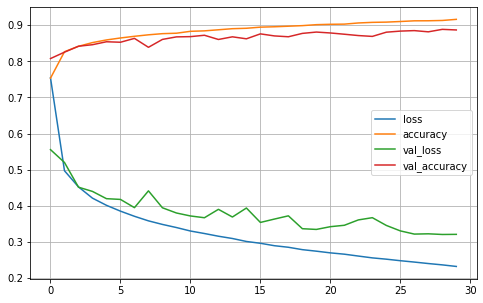

In [15]:
pd.DataFrame(logs.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

We can infer from the graph that the validation accuracy is on gradual inclination and the loss is declining steadily as expected.